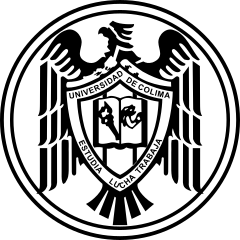

###  **Fac. de Ing. Mecánica y Eléctrica**
###  **Ing. Computación Inteligente**  
###  **Analitica Predictiva**
#### **Actividad Embeddings**
#### **Elavorado por:**
Emilio Israel Puga Hernández <br>
### **8° “D”**
### **28/05/2024**

## **Librerias utilizadas**

In [1]:
from num2words import num2words
from gensim.models import Word2Vec

## **Función para la normalización**

* Elimina puntos, comas y caracteres tales como:<br>`! \" # $ % & ' ( ) * + , - . / : ; < = > ? [ \\ ] ^ _ { | } ~ " “ ”`.
* Convierte todas las palabras a minúsculas.
* Elimina los casos nulos del corpus.
* Convierte los números a palabras con el uso de la librería `num2words`.

In [2]:
def normalizarCorpus(lista):
    sinPuntosComasEtc = []
    for palabra in lista:
        palabraNueva = palabra
        for caracter in palabra:
            if (33 <= ord(caracter) <= 47
                    or 58 <= ord(caracter) <= 63
                    or 91 <= ord(caracter) <= 95
                    or 123 <= ord(caracter) <= 126
                    or 8220 <= ord(caracter) <= 8221):
                palabraNueva = palabraNueva.replace(caracter, '')
        sinPuntosComasEtc.append(palabraNueva)

    enMinusculas = []
    for palabra in sinPuntosComasEtc:
        palabraNueva = palabra.lower()
        enMinusculas.append(palabraNueva)

    sinNulos = []
    for palabra in enMinusculas:
        if palabra != '':
            sinNulos.append(palabra)

    for id, num in enumerate(sinNulos):
        try:
            sinNulos[id] = int(num)
        except ValueError:
            pass

    numPalabra = []
    for num in sinNulos:
        palabraNueva = num
        if isinstance(num, int):
            palabraNueva = num2words(num, lang='es')
        numPalabra.append(palabraNueva)

    return numPalabra

## **Función stopWords**

Utiliza el archivo "stopwords-es.txt", el cual contiene las palabras que no aportan nada al texto. Tokenizo este archivo en una lista para posteriormente eliminar dichas palabras si se encuentran en mi corpus.

In [3]:
def stopWords(lista):
    with open('nlp/stopwords-es.txt', 'r', encoding='utf-8') as archivo:
        stopwords = []
        for palabra in archivo:
            stopwords.append(palabra.strip())

    sinStopwords = []
    for palabra in lista:
        if palabra not in stopwords:
            sinStopwords.append(palabra)

    return sinStopwords

## **Función Enbeddings**

Genera dos diccionarios:<br>
* `palabraIndice`: contiene cada palabra del vocabulario (corpus) como llave (`key`) y como valor (`value`) el “ID” de cada una de las palabras.
* `indicePalabra`: es el mimo caso que el anterior solo que, a la inversa, tiene cada “ID” como llave (`key`) y como valor (`value`) su palabra correspondiente.

Los IDs son generados según su iteración como una secuencia de tiempo, si la palabra “lógica” está en la iteración 33 su ID será 31, si fuese la primera seria 0.


In [4]:
palabraIndice = {}
indicePalabra = {}

def generarEmbeddings(corpusRes, corpus):
    global palabraIndice, indicePalabra
    ##### Obtencion de los indices #####

    palabraIndice = {}
    indicePalabra = {}
    for id, palabra in enumerate(corpusRes):
        palabraIndice[palabra] = id
        indicePalabra[id] = palabra

    ##### Embeddings #####

    data = []
    vetana = 2
    for centId, centPalabra in enumerate(corpus):
        for tempRan in range(- vetana, vetana + 1):
            contexId = centId + tempRan
            if contexId < 0 or contexId >= len(corpus) or contexId == centId:
                continue
            contexPalabra = corpus[contexId]
            data.append((palabraIndice[centPalabra], palabraIndice[contexPalabra]))
    return data

## **Función main**

In [5]:
corpus = []

def main():
    global corpus

    doc1 = 'nlp/Documento_ADEL.txt'
    doc2 = 'nlp/sistemas formales.txt'

    with open(doc2, 'r') as archivo:
        tokenizacion = []
        for linea in archivo:
            palabras = linea.split()
            for palabra in palabras:
                tokenizacion.append(palabra)

    normalizacion = normalizarCorpus(tokenizacion)

    corpus = stopWords(normalizacion)

if __name__ == '__main__':
    main()

## **Preparación de los datos**

Para que con la librería de “gensim” pueda recibir un corpus necesita tener la propiedad: <br>`corpus = [[‘palabras’, …]]`

In [6]:
corpusPros = [corpus]

## **Entrenamiento del Modelo**

Para entrenar el modelo con las características de la librería, se tiene esta documentación correspondiente, las que me interesan para este entrenamiento son:<br>


* **vector_size** (*int, optional*) – Dimensionality of the word vectors.

* **window** (*int, optional*) – Maximum distance between the current and predicted word within a sentence.

* **min_count** (*int, optional*) – Ignores all words with total frequency lower than this.

* **sg** (*`{0, 1}`, optional*) – Training algorithm: 1 for skip-gram; otheise CBOW.



In [7]:
modelo = Word2Vec(corpusPros, vector_size=len(corpus), window=2, min_count=1, sg=1, alpha=0.025, epochs=1000)

## **Guardar el Modelo**

In [8]:
modelo.save("./skipgram.model")

## **Cargar el Modelo**

In [9]:
cargarModelo = Word2Vec.load('./skipgram.model')

## **Palabra a evaluar**

In [18]:
palabra = "lógica"

## **Encontrar palabras similares**

Cuando se carga un modelo guardado de la librería `gensim` se necesita declara que es un modelo cargado con las propiedades necesarias, así que se usa `wv`.

La razón por la cal escogí esta librería fue por que tiene la función de buscar las palabras más similares usando `most_similar`.

In [19]:
if palabra in cargarModelo.wv:
    similares = cargarModelo.wv.most_similar(palabra)
    print(f"\nPalabras más similares a '{palabra}':\n")
    for similar_palabra, similitud in similares:
        print(f"  {similar_palabra}: {similitud}")
else:
    print(f"La palabra '{palabra}' no está en el vocabulario del modelo.")


Palabras más similares a 'lógica':

  fce: 0.7575773596763611
  paradigmático: 0.7423125505447388
  obtención: 0.7280243635177612
  anteriormente: 0.7266494035720825
  describiremos: 0.7188148498535156
  inferenciales: 0.6876607537269592
  resumirse: 0.67838454246521
  siglo: 0.6698052883148193
  inferencia: 0.6555670499801636
  básico: 0.6473241448402405


## **¿Por qué no uso la función para generar Embeddings?**

In [12]:
palabraIndice = {}
indicePalabra = {}

def generarEmbeddings(corpusRes, corpus):
    global palabraIndice, indicePalabra
    ##### Obtencion de los indices #####

    palabraIndice = {}
    indicePalabra = {}
    for id, palabra in enumerate(corpusRes):
        palabraIndice[palabra] = id
        indicePalabra[id] = palabra

    ##### Embeddings #####

    data = []
    vetana = 2
    for centId, centPalabra in enumerate(corpus):
        for tempRan in range(- vetana, vetana + 1):
            contexId = centId + tempRan
            if contexId < 0 or contexId >= len(corpus) or contexId == centId:
                continue
            contexPalabra = corpus[contexId]
            data.append((palabraIndice[centPalabra], palabraIndice[contexPalabra]))
    return data

Mi función crea pares de palabras basados en una ventana de contexto, pero no produce vectores de embeddings propiamente dichos, sino pares de índices de palabras. La biblioteca Gensim, por otro lado, espera texto crudo para generar embeddings usando modelos como Word2Vec.


Para que Gensim acepte mis datos, necesitas proporcionar una lista de listas de palabras (corpus tokenizado). Gensim se encargará de generar los embeddings basados en su propio algoritmo.

In [13]:
corpusRes = list(dict.fromkeys(corpus))

embeddings = generarEmbeddings(corpusRes, corpus)

In [14]:
print(f'{embeddings[:50]}\b...]')

[(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (3, 5), (4, 2), (4, 3), (4, 5), (4, 6), (5, 3), (5, 4), (5, 6), (5, 7), (6, 4), (6, 5), (6, 7), (6, 8), (7, 5), (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 10), (9, 7), (9, 8), (9, 10), (9, 11), (10, 8), (10, 9), (10, 11), (10, 12), (11, 9), (11, 10), (11, 12), (11, 13), (12, 10), (12, 11), (12, 13), (12, 7), (13, 11)...]


Pero el concepto de como se generan los Embeddings me queda claro y aquí lo puedo documentar. 

In [15]:
for i, j in embeddings:
    print(indicePalabra[i], indicePalabra[j])

lógica fce
lógica concepto
fce lógica
fce concepto
fce sistema
concepto lógica
concepto fce
concepto sistema
concepto formal
sistema fce
sistema concepto
sistema formal
sistema aproximación
formal concepto
formal sistema
formal aproximación
formal idea
aproximación sistema
aproximación formal
aproximación idea
aproximación formalización
idea formal
idea aproximación
idea formalización
idea intención
formalización aproximación
formalización idea
formalización intención
formalización describir
intención idea
intención formalización
intención describir
intención procedimientos
describir formalización
describir intención
describir procedimientos
describir exacta
procedimientos intención
procedimientos describir
procedimientos exacta
procedimientos precisa
exacta describir
exacta procedimientos
exacta precisa
exacta motivado
precisa procedimientos
precisa exacta
precisa motivado
precisa formalización
motivado exacta
motivado precisa
motivado formalización
motivado precisamente
formalización

## **Referencias**

https://radimrehurek.com/gensim/models/word2vec.html